In [47]:

import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame()

In [4]:
rating = pd.read_csv("title.ratings.tsv", index_col=None, sep="\t")

In [5]:
episode= pd.read_csv("episode.tsv", index_col=None, sep="\t")

In [6]:
print(episode)

            tconst parentTconst seasonNumber episodeNumber
0        tt0033908    tt8335206           \N            \N
1        tt0033952    tt8335206           \N            \N
2        tt0034547    tt8335206           \N            \N
3        tt0034657    tt8335206           \N            \N
4        tt0034731    tt8335206           \N            \N
5        tt0034753    tt8335206           \N            \N
6        tt0035226    tt8335206           \N            \N
7        tt0035657    tt8335206           \N            \N
8        tt0036119    tt8335206           \N            \N
9        tt0036399    tt8335206           \N            \N
10       tt0036547    tt8335206           \N            \N
11       tt0036656    tt8335206           \N            \N
12       tt0037090    tt8335206           \N            \N
13       tt0037198    tt8335206           \N            \N
14       tt0037480    tt8335206           \N            \N
15       tt0037709    tt8335206           \N            

In [7]:
episode.head(10)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0033908,tt8335206,\N,\N
1,tt0033952,tt8335206,\N,\N
2,tt0034547,tt8335206,\N,\N
3,tt0034657,tt8335206,\N,\N
4,tt0034731,tt8335206,\N,\N
5,tt0034753,tt8335206,\N,\N
6,tt0035226,tt8335206,\N,\N
7,tt0035657,tt8335206,\N,\N
8,tt0036119,tt8335206,\N,\N
9,tt0036399,tt8335206,\N,\N


In [8]:
rating.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1400
1,tt0000002,6.5,164
2,tt0000003,6.6,989
3,tt0000004,6.4,98
4,tt0000005,6.2,1684
5,tt0000006,5.6,87
6,tt0000007,5.5,566
7,tt0000008,5.6,1508
8,tt0000009,5.5,67
9,tt0000010,6.9,5021


In [9]:
#we can use merge to get the data with the same titles for example tt0000000
re=rating.merge(episode)

In [10]:
re.head(10)

,tconst,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber
0,tt0033908,7.8,1064,tt8335206,\N,\N
1,tt0033952,8.0,1391,tt8335206,\N,\N
2,tt0034547,7.8,895,tt8335206,\N,\N
3,tt0034657,7.8,914,tt8335206,\N,\N
4,tt0034731,7.7,784,tt8335206,\N,\N
5,tt0034753,7.4,731,tt8335206,\N,\N
6,tt0035226,7.5,787,tt8335206,\N,\N
7,tt0035657,7.5,764,tt8335206,\N,\N
8,tt0036119,7.8,822,tt8335206,\N,\N
9,tt0036399,7.5,682,tt8335206,\N,\N


In [11]:
rating.loc[rating['tconst'] == "tt0033908"]

,tconst,averageRating,numVotes
14746,tt0033908,7.8,1064


In [12]:
#delete the data with \N
re=re[re.seasonNumber != r'\N']
re=re[re.episodeNumber != r'\N']
re=re[re.tconst != r'\N']

In [13]:
#we don't need parentTconst, so, we drop it
re = re.drop('parentTconst', 1)

In [14]:
#convert the entries to numeric
re.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,tconst,averageRating,numVotes,seasonNumber,episodeNumber
40,tt0041951,7.4,35,1,9
57,tt0044093,4.3,10,1,6
68,tt0045960,7.1,140,2,3
74,tt0046855,6.7,89,1,4
75,tt0046864,6.4,5,5,20
84,tt0047852,3.5,14,1,15
85,tt0047961,8.8,12,6,5
87,tt0048302,6.2,25,1,6
88,tt0048378,5.9,158,1,6
90,tt0048462,6.9,10,1,3


In [15]:
ce = re.infer_objects()

In [16]:
ce.head(10)

,tconst,averageRating,numVotes,seasonNumber,episodeNumber
40,tt0041951,7.4,35,1,9
57,tt0044093,4.3,10,1,6
68,tt0045960,7.1,140,2,3
74,tt0046855,6.7,89,1,4
75,tt0046864,6.4,5,5,20
84,tt0047852,3.5,14,1,15
85,tt0047961,8.8,12,6,5
87,tt0048302,6.2,25,1,6
88,tt0048378,5.9,158,1,6
90,tt0048462,6.9,10,1,3


In [17]:
re.head(10)

,tconst,averageRating,numVotes,seasonNumber,episodeNumber
40,tt0041951,7.4,35,1,9
57,tt0044093,4.3,10,1,6
68,tt0045960,7.1,140,2,3
74,tt0046855,6.7,89,1,4
75,tt0046864,6.4,5,5,20
84,tt0047852,3.5,14,1,15
85,tt0047961,8.8,12,6,5
87,tt0048302,6.2,25,1,6
88,tt0048378,5.9,158,1,6
90,tt0048462,6.9,10,1,3


In [18]:
#set 'tconst' to the index column
pre=re.set_index('tconst')

In [19]:
ratingandepisode=pre.drop('numVotes',1)
ratingandepisode=ratingandepisode.drop('seasonNumber',1)

In [20]:
ratingandepisode.head(10)

,averageRating,episodeNumber
tconst,,
tt0041951,7.4,9
tt0044093,4.3,6
tt0045960,7.1,3
tt0046855,6.7,4
tt0046864,6.4,20
tt0047852,3.5,15
tt0047961,8.8,5
tt0048302,6.2,6
tt0048378,5.9,6


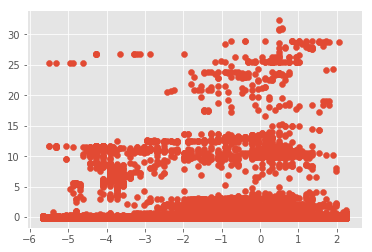

In [21]:
#preprocess data and get the arrays we need
processed=preprocessing.scale(ratingandepisode)

#plot the scaled data
x,y=processed.T
plt.scatter(x,y)

In [22]:
#We use K-means clustering
X=processed
kmeans = KMeans(n_clusters=5) #what if n_clusters=3 or 4?
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

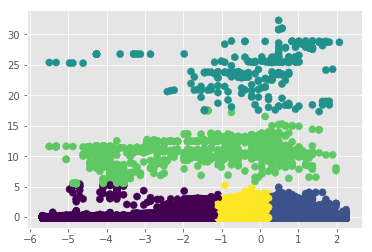

In [23]:
#scatter plot for n=5
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

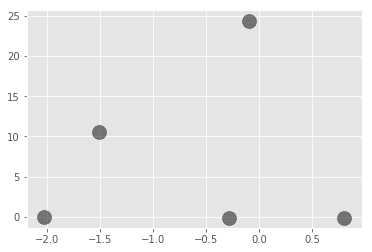

In [24]:
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [25]:
#We use K-means clustering
X=processed
kmeans = KMeans(n_clusters=5) #what if n_clusters=3 or 4?
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

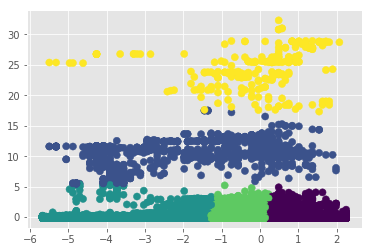

In [26]:
#scatter plot for n=5
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

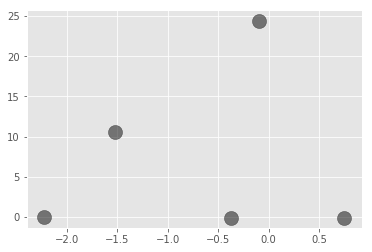

In [28]:
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

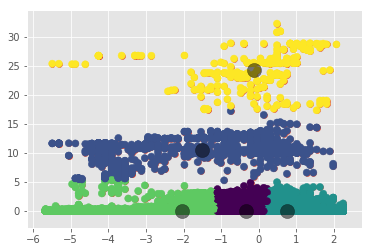

In [30]:
#preprocess data and get the arrays we need
processed=preprocessing.scale(ratingandepisode)

#plot the scaled data
x,y=processed.T
plt.scatter(x,y)

#take a look at the data,
#the data look like there are three clusters: up, middle and bottom
#so we will initially set the n=5 for the number of clusters (Please try
#the case where n=3 and n=4, and what do you find?)

#We use K-means clustering
X=processed
kmeans = KMeans(n_clusters=5) #what if n_clusters=3 or 4?
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#scatter plot for n=5
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

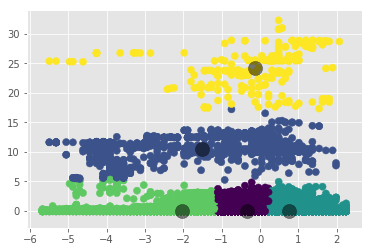

In [31]:
#scatter plot for n=5
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

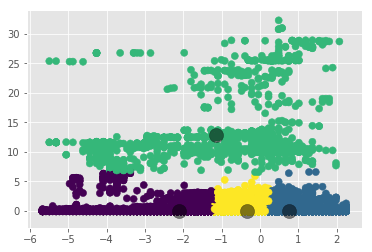

In [32]:
#We use K-means clustering
X=processed
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#scatter plot for n=5
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a137b3c18>,
      dtype=object)

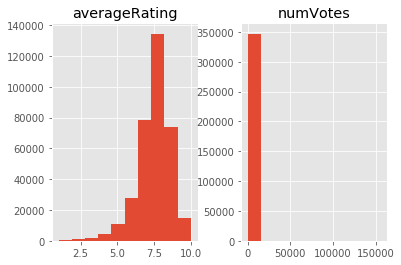

In [34]:
re.hist()


In [35]:
rn=re

#set index
rnpre=rn.set_index('tconst')

#drop seasonNumber and episodeNumber
ratingandnum=rnpre.drop('seasonNumber',1)
ratingandnum=ratingandnum.drop('episodeNumber',1)

#scale data
processedrn=preprocessing.scale(ratingandnum)
xnew2,ynew2=processedrn.T


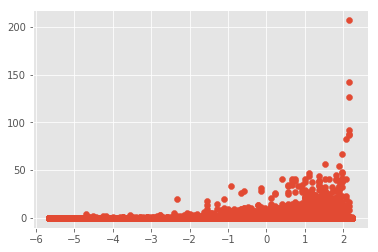

In [36]:

#plot data
plt.scatter(xnew2,ynew2)

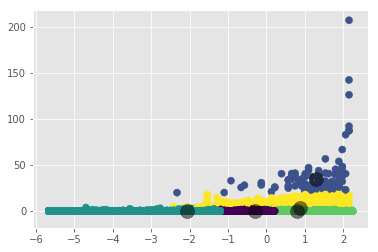

In [37]:
#see the data, we set n_cluster=5 first
X2=processedrn
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2)
y2_kmeans = kmeans.predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2_kmeans, s=50, cmap='viridis')
#name the centers of the clusters
centers = kmeans.cluster_centers_
#plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [38]:
rating

,tconst,averageRating,numVotes
0,tt0000001,5.8,1400
1,tt0000002,6.5,164
2,tt0000003,6.6,989
3,tt0000004,6.4,98
4,tt0000005,6.2,1684
5,tt0000006,5.6,87
6,tt0000007,5.5,566
7,tt0000008,5.6,1508
8,tt0000009,5.5,67
9,tt0000010,6.9,5021
